In [1]:
#Puerta AND
"""
data = [ [ 0, 0],
        [ 0, 1],
         [ 1, 0],
        [ 1, 1] ]
target = [0,
         0,
         0,
         1 ]
"""

In [15]:
# OR GATE

data = [ [ 0, 0],
         [ 0, 1],
         [ 1, 0],
         [ 1, 1] ]
target = [  0,
            1,
            1,
            1 ]


AGREGANDO LOS DATOS DE ENTRENAMIENTO

In [16]:
print ("Data:",data)
print ("target", target)

Data: [[0, 0], [0, 1], [1, 0], [1, 1]]
target [0, 1, 1, 1]


Inicializo los pesos, bias, y la tasa de aprendizaje

Iterando sobre los datos de entrenamiento

In [17]:
from tabulate import tabulate
w1 = 0.3
w2 = 0.8
b = 0.6
lr=0.6
iterations =10
data_out = [ ]
weigths = [ ]
weigths.append( [w1, w2, b])
for epoch in range ( iterations):
  #primer =  verdadero
  for x,y in zip (data,target):
    yin = w1*x[0] + w2*x[1] + b
    #Funcion de activacion de Adaline
    if ( yin >= 0.5  ): #recordar modificar a 0.5 EN AND o -0.5 EN OR
       yin = 1
    else:
       yin = 0
    e = y-yin
    if int(y) != int(yin):  # Actualizando los pesos y el bias
      w1 = w1 + lr*e*x[0]
      w2 = w2 + lr*e*x[1]
      b = b + lr*e
      #guardando los pesos actualizados
      weigths.append( [w1, w2, b])
    data_out.append(  [epoch, x[0], x[1], yin, y, y, e, '-', w1,w2,b, int(y) != int(yin)] )
  data_out.append (['-','-','-','-','-','-','-','-','-','-','-'])
print(tabulate( data_out,
                headers=['Epoch', 'x1', 'x2', 'yin', 'y', 't', 'E','-', 'w1', 'w2','b', 'update']))

Epoch    x1    x2    yin    y    t    E    -    w1                  w2    b    update
-------  ----  ----  -----  ---  ---  ---  ---  ------------------  ----  ---  --------
0        0     0     1      0    0    -1   -    0.3                 0.8   0.0  True
0        0     1     1      1    1    0    -    0.3                 0.8   0.0  False
0        1     0     0      1    1    1    -    0.8999999999999999  0.8   0.6  True
0        1     1     1      1    1    0    -    0.8999999999999999  0.8   0.6  False
-        -     -     -      -    -    -    -    -                   -     -
1        0     0     1      0    0    -1   -    0.8999999999999999  0.8   0.0  True
1        0     1     1      1    1    0    -    0.8999999999999999  0.8   0.0  False
1        1     0     1      1    1    0    -    0.8999999999999999  0.8   0.0  False
1        1     1     1      1    1    0    -    0.8999999999999999  0.8   0.0  False
-        -     -     -      -    -    -    -    -                   -    

Creando su representacion visual

[0.3, 0.8, 0.6]
[0.3, 0.8, 0.0]
[0.8999999999999999, 0.8, 0.6]
[0.8999999999999999, 0.8, 0.0]


<Figure size 640x480 with 0 Axes>

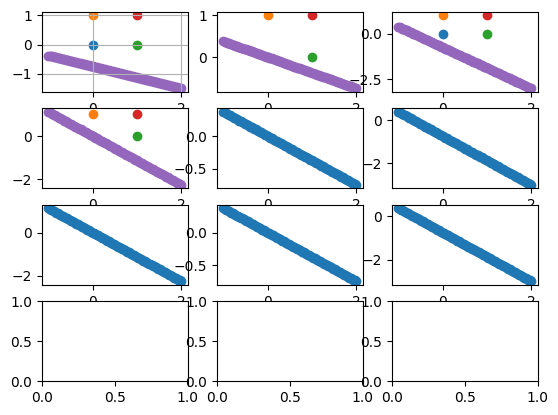

In [18]:
#Construyendo el hyperplano: ax + by + cz = d
import numpy as np
import matplotlib.pyplot as plt
a,b,c = w1,w2,b
data_arr = np.array( data )
x_min = min( data_arr[: ,0 ]-1)
x_max = max( data_arr[: ,0 ]+1)
x = np.linspace(x_min, x_max, 100)
pairs = []
for ws in weigths:
  it = []
  for xi in  x :
    #   weigths.append( [w1, w2, b])
    y = (-ws[2] -ws[0]*xi) /ws[1]
    it.append( [xi,y])
  pairs.append(it)
  print(ws)
data_arr = np.array( data )
data_arr_x = data_arr [ : , 0 ]
data_arr_y = data_arr [ : , 1 ]
pairs = np.array(pairs)
plt.figure(1)
fig, axis = plt.subplots(4, 3)
for idx,idy in zip ( data_arr_x, data_arr_y  ):
    axis[0,0].scatter(idx, idy )
    axis[0,1].scatter(idx, idy )
    axis[0,2].scatter(idx, idy )
    axis[1,0].scatter(idx, idy )
axis[0,0].scatter(pairs[0,: ,0], pairs[0, :,1] )
axis[0,0].grid()
axis[0,1].scatter(pairs[1,: ,0], pairs[1, :,1]  )
axis[0,2].scatter(pairs[2,: ,0], pairs[2, :,1]  )
axis[1,0].scatter(pairs[3,: ,0], pairs[3, :,1]  )
axis[1,1].scatter(pairs[1,: ,0], pairs[1, :,1]  )
axis[1,2].scatter(pairs[2,: ,0], pairs[2, :,1]  )
axis[2,0].scatter(pairs[3,: ,0], pairs[3, :,1]  )
axis[2,1].scatter(pairs[1,: ,0], pairs[1, :,1]  )
axis[2,2].scatter(pairs[2,: ,0], pairs[2, :,1]  )
